In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/traffic signal dataset/archive.zip"
with ZipFile(file_name,'r') as zip:
 zip.extractall()
 print('Done')

Done


In [7]:
imgs_path = "/content/traffic_Data/DATA"
data_list = []
labels_list = []
classes_list = 57
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-57
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

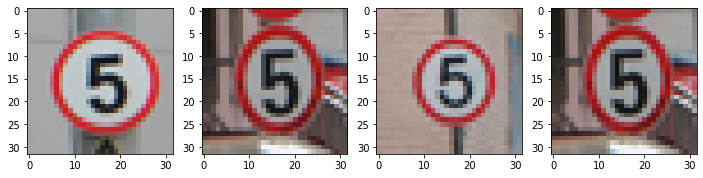

In [8]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [9]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

In [11]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(57,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [13]:
history= model.fit(X_train,Y_train,epochs=20,batch_size=64,validation_data=(X_val,Y_val))

Epoch 1/20
53/53 [==============================] - 206s 4s/step - loss: 3.9793 - accuracy: 0.2741 - val_loss: 3.3035 - val_accuracy: 0.1226
Epoch 2/20
53/53 [==============================] - 199s 4s/step - loss: 1.5187 - accuracy: 0.5434 - val_loss: 1.5015 - val_accuracy: 0.5385
Epoch 3/20
53/53 [==============================] - 192s 4s/step - loss: 0.9519 - accuracy: 0.7070 - val_loss: 0.8141 - val_accuracy: 0.7308
Epoch 4/20
53/53 [==============================] - 190s 4s/step - loss: 0.6066 - accuracy: 0.8085 - val_loss: 0.7415 - val_accuracy: 0.7885
Epoch 5/20
53/53 [==============================] - 200s 4s/step - loss: 0.4195 - accuracy: 0.8742 - val_loss: 0.4654 - val_accuracy: 0.8341
Epoch 6/20
53/53 [==============================] - 191s 4s/step - loss: 0.3160 - accuracy: 0.8976 - val_loss: 0.6161 - val_accuracy: 0.8005
Epoch 7/20
53/53 [==============================] - 193s 4s/step - loss: 0.2164 - accuracy: 0.9295 - val_loss: 0.4768 - val_accuracy: 0.8750
Epoch 8/20
53

Text(0.5, 1.0, 'Loss')

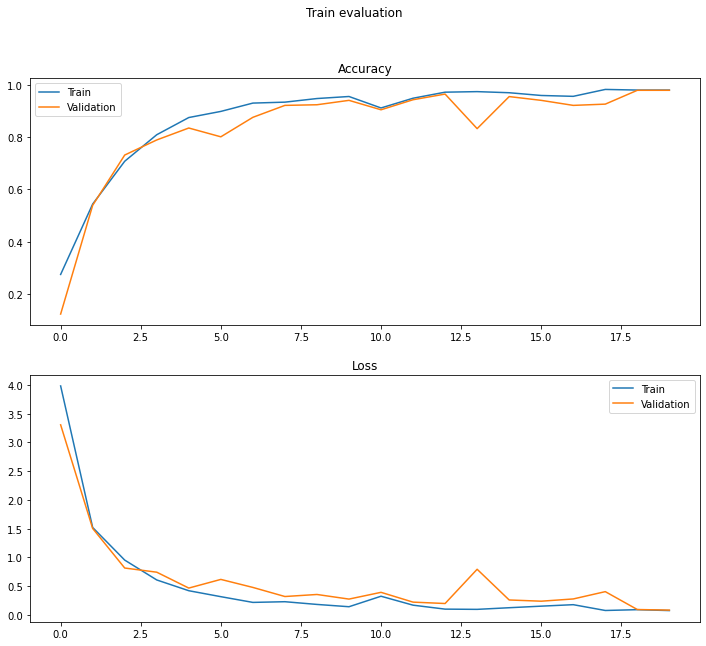

In [14]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [15]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

14/14 [==============================] - 7s 493ms/step
-Acuracy achieved: 98.08%
-Accuracy by model was: 97.93%
-Accuracy by validation was: 97.84%


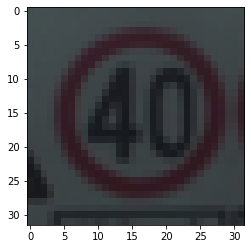

In [47]:
test_path = "/content/traffic_Data/TEST"
for img in os.listdir(test_path):
        im = Image.open(test_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
test_data = np.array(data_list) 
img=test_data[345]
plt.imshow(img) 
plt.show()     



In [48]:
img=(np.expand_dims(img,0))
img.shape

(1, 32, 32, 3)

In [49]:
y_pred = model.predict(img)
print(y_pred)

1/1 [==============================] - 0s 71ms/step
[[1.6779235e-07 9.6199562e-07 1.2535521e-06 9.9992907e-01 7.7430983e-08
  5.9318965e-05 9.3611106e-08 2.1502885e-07 9.9721377e-11 4.8861061e-06
  2.8572205e-09 6.3958829e-09 7.1152784e-10 2.9848415e-09 9.9911972e-07
  1.4533672e-09 3.5671267e-08 7.7852069e-10 2.6742151e-07 9.8165511e-09
  6.1084115e-16 1.0060869e-12 1.8605005e-11 2.2829236e-10 3.4369356e-12
  4.3148413e-15 2.0119405e-12 2.2450354e-11 2.7125323e-11 5.4716881e-10
  3.0026252e-11 1.5786715e-13 8.1349240e-11 8.7860066e-11 4.4216343e-14
  2.5647307e-07 7.4004824e-10 2.0442148e-10 1.8283151e-06 2.0909803e-10
  2.4205607e-10 4.3734131e-11 1.8385078e-09 2.9790434e-07 3.6096133e-09
  2.1920746e-12 4.6826518e-08 4.5981456e-12 7.1651907e-10 8.5557978e-09
  3.0984881e-11 2.9064912e-13 2.0517864e-07 2.7773045e-10 5.3456706e-10
  2.8101617e-09 6.6464305e-09]]
